In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
data_train_path = '/content/drive/MyDrive/Research/era-images/training'
data_validation_path = '/content/drive/MyDrive/Research/era-images/validating'
data_test_path = '/content/drive/MyDrive/Research/era-images/testing'

In [93]:
img_width = 180
img_height = 180



In [94]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 1973 files belonging to 2 classes.


In [95]:
data_cat = data_train.class_names
data_cat

['mahanuwara', 'polonnaruwa']

In [96]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 564 files belonging to 2 classes.


In [97]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 283 files belonging to 2 classes.


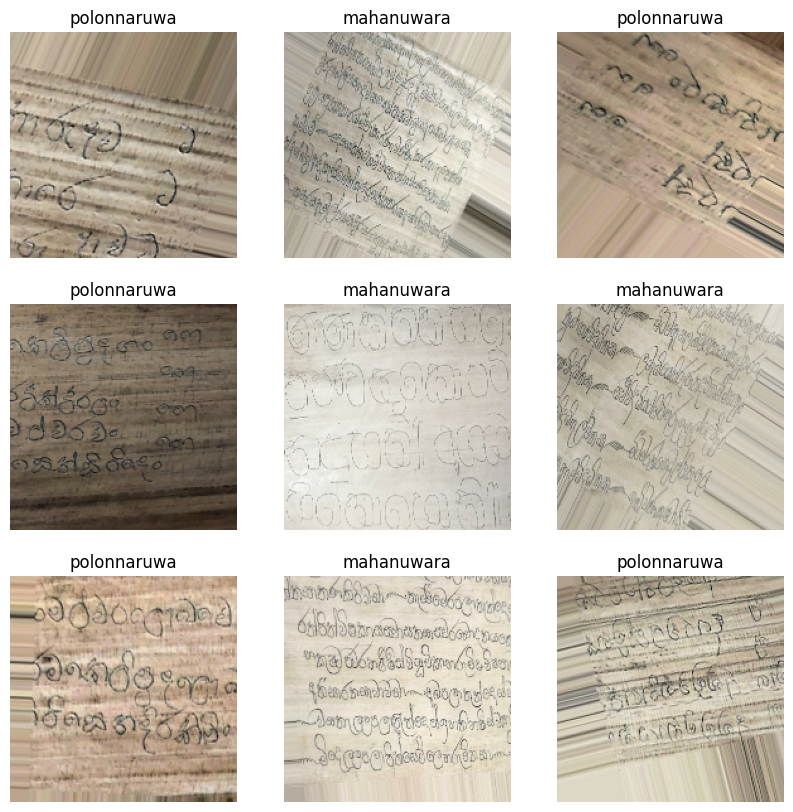

In [98]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [99]:
from tensorflow.keras import Sequential, layers

In [100]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [101]:
model = Sequential([
    # data_augmentation,
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [102]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [103]:
epoches_size=4
history=model.fit(data_train, validation_data=data_val, epochs=epoches_size)

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


62/62 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5854 - loss: 0.7387 - val_accuracy: 0.9007 - val_loss: 0.2487
Epoch 2/4
62/62 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9327 - loss: 0.1652 - val_accuracy: 0.9699 - val_loss: 0.1234
Epoch 3/4
62/62 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9485 - loss: 0.1344 - val_accuracy: 0.9131 - val_loss: 0.2178
Epoch 4/4
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9364 - loss: 0.1417 - val_accuracy: 0.9663 - val_loss: 0.0984


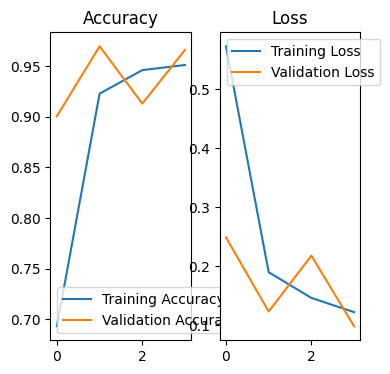

In [104]:
epochs_range = range(epoches_size)
plt.figure(figsize=(4, 4))

# Plot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot for Loss
plt.subplot(1, 2, 2)  # Corrected subplot position
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [106]:
true_labels = np.concatenate([labels.numpy() for _, labels in data_test])
predictions = model.predict(data_test)
predicted_labels = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 613ms/step


In [107]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [108]:
predictions = model.predict(data_test)
predicted_labels = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 439ms/step


In [109]:
predictions

array([[9.48870182e-01, 5.11298180e-02],
       [9.98716176e-01, 1.28373329e-03],
       [9.96959388e-01, 3.04052816e-03],
       [9.98204112e-01, 1.79591670e-03],
       [9.98705745e-01, 1.29419041e-03],
       [9.98380005e-01, 1.62001909e-03],
       [9.98252332e-01, 1.74763938e-03],
       [9.94427085e-01, 5.57287829e-03],
       [9.93516088e-01, 6.48395903e-03],
       [8.26318383e-01, 1.73681587e-01],
       [9.95618105e-01, 4.38190857e-03],
       [9.94652569e-01, 5.34731429e-03],
       [9.87486780e-01, 1.25132287e-02],
       [9.96914089e-01, 3.08581954e-03],
       [9.94612217e-01, 5.38765546e-03],
       [9.95061398e-01, 4.93860152e-03],
       [9.94442165e-01, 5.55781787e-03],
       [9.90061998e-01, 9.93799511e-03],
       [9.91410971e-01, 8.58900510e-03],
       [9.93292391e-01, 6.70759846e-03],
       [9.88944113e-01, 1.10558560e-02],
       [9.94454443e-01, 5.54551836e-03],
       [9.85776246e-01, 1.42237367e-02],
       [9.96425927e-01, 3.57405818e-03],
       [9.849367

In [110]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [111]:
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

Testing Accuracy: 96.47%


Confusion Matrix:
 [[139   1]
 [  9 134]]


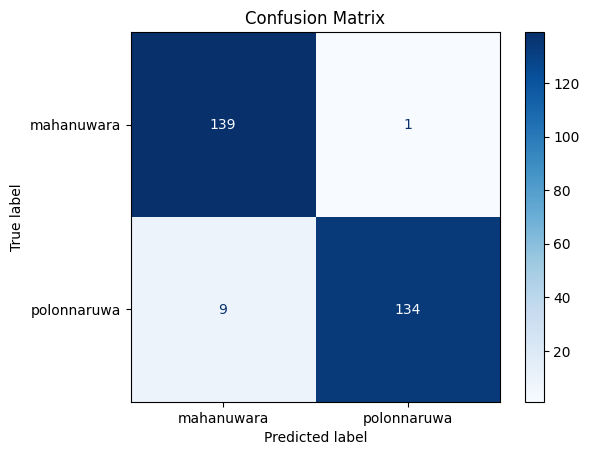

In [112]:
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", cm)

class_names = data_cat
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [113]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [114]:
def predict_image_class(image_path, model, class_names):

    img = load_img(image_path, target_size=(180, 180))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    return predicted_class, confidence

In [115]:
# class_names = data_cat

# image_path = './output.png'

# img = load_img(image_path, target_size=(180, 180))
# img_array = img_to_array(img) / 255.0
# img_array = np.expand_dims(img_array, axis=0)

# predictions = model.predict(img_array)

# predictions

In [116]:
predicted_class = np.argmax(predictions)
predicted_class

301

In [117]:
# class_names = data_cat

# image_path = './output.png'


# img = load_img(image_path, target_size=(180, 180))
# img_array = img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)

# predictions = model.predict(img_array)

# predicted_class, confidence = predict_image_class(image_path, model, class_names)

# # Print the results
# print(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}")


In [118]:
# import tensorflow as tf
# from tensorflow.keras.utils import load_img, img_to_array
# import numpy as np

# def predict_image_class(image_path, model, class_names):
#     """
#     Predict the class of a single image.

#     Args:
#         image_path (str): Path to the image file.
#         model (tf.keras.Model): Trained Keras model.
#         class_names (list): List of class names corresponding to the model's output.

#     Returns:
#         predicted_class (str): Predicted class name.
#         confidence (float): Confidence score for the prediction.
#     """

#     img = load_img(image_path, target_size=(180, 180))
#     img_array = img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)

#     predictions = model.predict(img_array)
#     predicted_class = class_names[np.argmax(predictions)]
#     confidence = np.max(predictions)

#     return predicted_class, confidence

# # Define the class names
# class_names = data_cat

# # Path to the single image for prediction
# image_path = './output.png'

# # Predict the class of the image
# predicted_class, confidence = predict_image_class(image_path, model, class_names)

# # Display the result
# print(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}")


In [121]:
model.save('/content/drive/MyDrive/Research/era_predict.model.h5')